In [1]:
 #conda install -c plotly plotly

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import sys
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [3]:
file = open("cena2-2pol-or.pkl", "rb")
r = pickle.load(file)

In [4]:
r.keys()

dict_keys(['train', 'val', 'results'])

In [5]:
def SPLIT(names):

  splited = []
  for coluns in range(len(names)):
      splited.append(names[coluns].split('-'))

  return splited

In [6]:
def split(names):
  splited = []
  for coluns in range(len(names)):
      splited.append(names[coluns].split('-'))

  return splited

In [7]:
def results(a, name):
  #a= df['results'][x]
  #name = dict_keys(['train_loss', 'val_loss', 'train_acc', 'val_acc'])
  min = np.min(a[name])
  mean = np.mean(a[name])
  max = np.max(a[name])
  last = a[name][-1]

  return min, mean, max, last

In [8]:
def table(df):
  aux=[]
  for idx in range(len(df)):
    aux1=[]
   
    tr_name = split([df['train'][idx]]) # split train names
    val_name = split([df['val'][idx]]) # split val names

    d = df['results'][idx]

    t_min, t_mean, t_max, t_last = results(d, 'train_acc') #####
    v_min, v_mean, v_max, v_last = results(d, 'val_acc')
    aux1.extend([tr_name, val_name, t_min, t_mean, t_max, t_last, v_min, v_mean, v_max, v_last])
    aux.append(aux1)

  return aux


In [9]:
np.shape(r['train'])

(210,)

In [10]:
df = pd.DataFrame.from_dict(r)
df.head()

train                            val  \
0  dist-x1-seed3561-1900d-180min    dist-x1-seed11-1900d-180min   
1  dist-x1-seed3561-1900d-180min   dist-x1-seed535-1900d-180min   
2  dist-x1-seed3561-1900d-180min    dist-x1-seed33-1900d-180min   
3  dist-x1-seed3561-1900d-180min   dist-x1-seed981-1900d-180min   
4  dist-x1-seed3561-1900d-180min  dist-x1-seed2685-1900d-180min   

                                             results  
0  {'train_loss': [1.3910270929336548, 2.01575970...  
1  {'train_loss': [1.314732313156128, 1.942499041...  
2  {'train_loss': [1.232496976852417, 2.119988441...  
3  {'train_loss': [1.2197840213775635, 2.01047682...  
4  {'train_loss': [1.0310275554656982, 1.35024011...

In [11]:
print(df['train'][0])

dist-x1-seed3561-1900d-180min


In [12]:
header = ['train', 'val', 'tr_acc_min', 'tr_acc_mean', 'tr_acc_max', 'tr_acc_last', 'v_acc_min', 'v_acc_mean', 'v_acc_max', 'v_acc_last']
r_df = pd.DataFrame(r)
r_df.head()

train                            val  \
0  dist-x1-seed3561-1900d-180min    dist-x1-seed11-1900d-180min   
1  dist-x1-seed3561-1900d-180min   dist-x1-seed535-1900d-180min   
2  dist-x1-seed3561-1900d-180min    dist-x1-seed33-1900d-180min   
3  dist-x1-seed3561-1900d-180min   dist-x1-seed981-1900d-180min   
4  dist-x1-seed3561-1900d-180min  dist-x1-seed2685-1900d-180min   

                                             results  
0  {'train_loss': [1.3910270929336548, 2.01575970...  
1  {'train_loss': [1.314732313156128, 1.942499041...  
2  {'train_loss': [1.232496976852417, 2.119988441...  
3  {'train_loss': [1.2197840213775635, 2.01047682...  
4  {'train_loss': [1.0310275554656982, 1.35024011...

In [13]:
r1 = table(r_df)
r2 = pd.DataFrame(r1, columns=header)
r3 = r_df[['train', 'val']]
r2.drop(['train','val'], axis=1)

tr_acc_min  tr_acc_mean  tr_acc_max tr_acc_last  v_acc_min  v_acc_mean  \
0     32.000000    45.851109   55.000000   45.333336  33.333336   46.207779   
1     38.000000    49.861115   57.666664   52.999996  35.666664   50.531109   
2     38.666664    53.237782   61.666668   57.333332  35.666664   53.651112   
3     41.333332    54.983334   63.333332   54.333336  39.666668   54.743332   
4     47.666664    57.622219   65.666672   55.666668  44.666664   57.261112   
..          ...          ...         ...         ...        ...         ...   
205   81.333336    91.769997   96.000000        93.0  86.000000   91.906670   
206   85.666672    91.631111   96.000000        93.0  86.666664   91.373337   
207   79.666672    91.977783   96.000000   92.333336  82.333336   91.442223   
208   84.333328    92.371109   97.333336    91.66667  86.000000   91.978889   
209   87.000000    92.028893   95.666664   92.333336  85.666672   92.225563   

     v_acc_max v_acc_last  
0    54.000004  43.333332  
1    58.000000  57.666664  
2    63.333332  52.666664  
3    63.666664  57.333332  
4    65.000000       55.0  
..         ...        ...  
205  96.333328       93.0  
206  95.666664   90.66667  
207  95.333328   90.66667  
208  95.666664  93.333336  
209  96.000000  94.333336  

[210 rows x 8 columns]

In [14]:
r3.head()

train                            val
0  dist-x1-seed3561-1900d-180min    dist-x1-seed11-1900d-180min
1  dist-x1-seed3561-1900d-180min   dist-x1-seed535-1900d-180min
2  dist-x1-seed3561-1900d-180min    dist-x1-seed33-1900d-180min
3  dist-x1-seed3561-1900d-180min   dist-x1-seed981-1900d-180min
4  dist-x1-seed3561-1900d-180min  dist-x1-seed2685-1900d-180min

In [15]:
df_t = SPLIT(r3['train'])
df_v = SPLIT(r3['val'])

In [16]:
df_t[:3]

[['dist', 'x1', 'seed3561', '1900d', '180min'],
 ['dist', 'x1', 'seed3561', '1900d', '180min'],
 ['dist', 'x1', 'seed3561', '1900d', '180min']]

In [17]:
#df = pd.concat( [ pd.DataFrame(df_t, columns=['csv','scene','TR_x', 'TR_Diistance', 'TR_seed', 'TR_Days','TR_Range']), 
#                 pd.DataFrame(df_v, columns=['csv','scene','V_x', 'V_Diistance', 'V_seed', 'V_Days','V_Range']), r2 ], axis=1 )

df = pd.concat( [ pd.DataFrame(df_t, columns=['TR_x', 'TR_Diistance', 'TR_seed', 'TR_Days','TR_Range']), 
                 pd.DataFrame(df_v, columns=['V_x', 'V_Diistance', 'V_seed', 'V_Days','V_Range']), r2 ], axis=1 )

In [18]:
df=df.drop(['train', 'val'], axis=1)
##df=df.drop(['csv','scene','TR_x','TR_Days','V_x','V_Days'], axis=1)
df=df.drop(['TR_x','TR_Days','V_x','V_Days'], axis=1)

In [19]:
df.head()

TR_Diistance   TR_seed TR_Range V_Diistance    V_seed V_Range  tr_acc_min  \
0           x1  seed3561   180min          x1    seed11  180min   32.000000   
1           x1  seed3561   180min          x1   seed535  180min   38.000000   
2           x1  seed3561   180min          x1    seed33  180min   38.666664   
3           x1  seed3561   180min          x1   seed981  180min   41.333332   
4           x1  seed3561   180min          x1  seed2685  180min   47.666664   

   tr_acc_mean  tr_acc_max tr_acc_last  v_acc_min  v_acc_mean  v_acc_max  \
0    45.851109   55.000000   45.333336  33.333336   46.207779  54.000004   
1    49.861115   57.666664   52.999996  35.666664   50.531109  58.000000   
2    53.237782   61.666668   57.333332  35.666664   53.651112  63.333332   
3    54.983334   63.333332   54.333336  39.666668   54.743332  63.666664   
4    57.622219   65.666672   55.666668  44.666664   57.261112  65.000000   

  v_acc_last  
0  43.333332  
1  57.666664  
2  52.666664  
3  57.333332  
4       55.0

In [20]:
grafico1 = px.parallel_categories(df, dimensions=['TR_Diistance', 'TR_Range','V_Diistance', 'V_Range'], color='v_acc_mean')
grafico1.show()

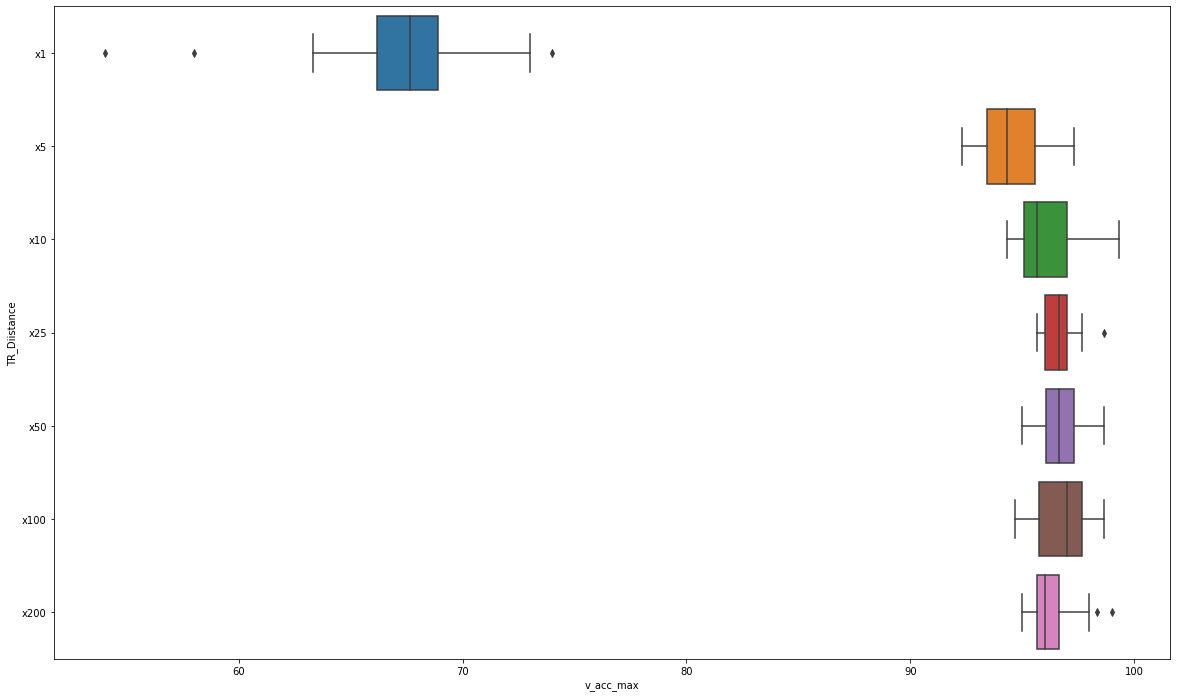

In [21]:
plt.figure(figsize=(20,12))
fig = sns.boxplot(data=df, x="v_acc_max", y="TR_Diistance", 
            order = ['x1','x5','x10','x25','x50','x100','x200'])
#fig.set(xlabel='Max Accuracy (Validation)', ylabel = 'Training dataset distance')

In [33]:
## FIGURA 1 DOS RESULTADOS DO ARTIGO - TAMANHO E FONTE OK
plt.figure(figsize=(20,12))
plt.rc('font', size=48)
plt.rcParams['figure.dpi'] = 600
fig = sns.boxplot(data=df, x="v_acc_mean", y="TR_Diistance", 
            order = ['x1','x5','x10','x25','x50','x100','x200'])
fig.set(xlabel='Mean Accuracy % (Validation)', ylabel = 'Training dataset relative distance')

[Text(0.5, 0, 'Mean Accuracy % (Validation)'),
 Text(0, 0.5, 'Training dataset relative distance')]

In [23]:
df2=df
df2.head()

TR_Diistance   TR_seed TR_Range V_Diistance    V_seed V_Range  tr_acc_min  \
0           x1  seed3561   180min          x1    seed11  180min   32.000000   
1           x1  seed3561   180min          x1   seed535  180min   38.000000   
2           x1  seed3561   180min          x1    seed33  180min   38.666664   
3           x1  seed3561   180min          x1   seed981  180min   41.333332   
4           x1  seed3561   180min          x1  seed2685  180min   47.666664   

   tr_acc_mean  tr_acc_max tr_acc_last  v_acc_min  v_acc_mean  v_acc_max  \
0    45.851109   55.000000   45.333336  33.333336   46.207779  54.000004   
1    49.861115   57.666664   52.999996  35.666664   50.531109  58.000000   
2    53.237782   61.666668   57.333332  35.666664   53.651112  63.333332   
3    54.983334   63.333332   54.333336  39.666668   54.743332  63.666664   
4    57.622219   65.666672   55.666668  44.666664   57.261112  65.000000   

  v_acc_last  
0  43.333332  
1  57.666664  
2  52.666664  
3  57.333332  
4       55.0

In [24]:
df2.groupby(['TR_Diistance']).mean()

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Diistance                                                               
x1             49.355555    59.385000   67.499999  49.188889   59.122814   
x10            86.322222    92.294259   96.311110  85.722222   91.893482   
x100           84.377778    93.060296   96.955554  84.266667   92.645740   
x200           83.788890    92.497853   96.566666  83.566668   92.071409   
x25            86.733334    92.915927   96.966666  86.155555   92.483223   
x5             82.811111    90.491036   95.100000  82.288889   89.914592   
x50            85.866666    93.097073   97.122223  85.211111   92.794704   

              v_acc_max  
TR_Diistance             
x1            67.088889  
x10           96.022221  
x100          96.811111  
x200          96.266665  
x25           96.666666  
x5            94.655555  
x50           96.744444

In [25]:
df2.groupby(['TR_Diistance']).std()

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Diistance                                                               
x1              5.954446     4.306881    4.252337   6.545265    4.031907   
x10             2.588633     1.902789    1.400421   2.337571    1.666579   
x100            4.477901     1.593624    1.170303   4.101585    1.425298   
x200            4.892314     1.480385    1.121543   4.896750    1.210654   
x25             2.967770     1.284456    0.948281   3.062232    0.990682   
x5              4.232409     2.384046    1.755451   3.979577    1.907046   
x50             2.872248     1.274976    1.066681   3.434647    1.170282   

              v_acc_max  
TR_Diistance             
x1             3.880329  
x10            1.280367  
x100           1.078114  
x200           0.988053  
x25            0.727144  
x5             1.388191  
x50            0.920952

In [26]:
df2.groupby(['TR_Diistance']).quantile([.25,.75])

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Diistance                                                                    
x1           0.25   46.166667    58.228613   65.833338  45.083331   57.791945   
             0.75   52.999996    62.226115   70.333328  53.583335   61.204997   
x10          0.25   84.416664    90.895271   95.083332  84.333328   90.688055   
             0.75   88.000000    93.979719   97.333336  87.250002   93.026667   
x100         0.25   81.749998    91.784996   96.333328  81.083334   91.586111   
             0.75   87.166668    94.313608   97.916668  86.000000   93.632772   
x200         0.25   81.083334    91.621115   95.666664  81.666664   91.316671   
             0.75   87.000000    92.878056   97.333336  86.000000   92.496391   
x25          0.25   85.083334    92.055557   96.333328  84.083332   91.831667   
             0.75   88.583332    93.359169   97.333336  88.166668   93.058889   
x5           0.25   79.666672    88.411114   93.666664  79.083334   88.123333   
             0.75   85.750000    92.304173   96.583330  85.250002   91.546940   
x50          0.25   83.833330    92.158886   96.333328  83.000000   92.085836   
             0.75   88.000000    93.922499   97.666672  87.666664   93.485277   

                   v_acc_max  
TR_Diistance                  
x1           0.25  66.166668  
             0.75  68.916666  
x10          0.25  95.083332  
             0.75  97.000000  
x100         0.25  95.749998  
             0.75  97.666672  
x200         0.25  95.666664  
             0.75  96.666664  
x25          0.25  96.000000  
             0.75  97.000000  
x5           0.25  93.416668  
             0.75  95.583330  
x50          0.25  96.083332  
             0.75  97.333336

In [34]:
plt.figure(figsize=(20,12))
plt.rc('font', size=48)
plt.rcParams['figure.dpi'] = 600
fig2 = sns.boxplot(data=df, x="v_acc_mean", y="TR_Range",
            order = ['10min','30min','60min','180min','360min','720min'])
fig2.set(xlabel='Mean Accuracy % (Validation)', ylabel = 'Training dataset acq. time')

[Text(0.5, 0, 'Mean Accuracy % (Validation)'),
 Text(0, 0.5, 'Training dataset acq. time')]

In [28]:
df3 = df

In [29]:
df3.groupby(['TR_Range']).max()


TR_Diistance  TR_seed V_Diistance   V_seed V_Range  tr_acc_min  \
TR_Range                                                                  
10min             x50  seed981         x50  seed981   10min   87.333336   
180min            x50  seed535         x50  seed981  180min   87.333336   
30min             x50  seed981         x50  seed981   30min   88.333336   
360min            x50  seed981         x50  seed981  360min   90.333328   
60min             x50  seed981         x50  seed981   60min   88.333336   
720min            x50  seed981         x50  seed981  720min   94.000000   

          tr_acc_mean  tr_acc_max  tr_acc_last  v_acc_min  v_acc_mean  \
TR_Range                                                                
10min       93.131111   98.333336    94.000000  87.333336   92.988884   
180min      93.947777   97.666672    95.000000  89.333328   93.241112   
30min       92.830002   97.333336    94.333336  87.666664   92.811104   
360min      95.313332   98.666672    96.666664  89.666664   94.997772   
60min       93.113335   97.333336    94.666664  87.333336   92.732224   
720min      97.325562  100.000000    97.333336  92.000000   96.831116   

          v_acc_max  v_acc_last  
TR_Range                         
10min     98.333336   94.000000  
180min    97.666672   94.666664  
30min     97.333336   94.333336  
360min    98.333336   95.666664  
60min     98.666672   95.333328  
720min    99.333336   97.000000

In [30]:
df3.groupby(['TR_Range']).mean()

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Range                                                               
10min      78.161904    86.723048   91.752379  77.990476   86.636223   
180min     77.885714    86.331397   91.123809  77.876190   85.948475   
30min      78.723810    86.771238   91.761904  78.342857   86.612000   
360min     82.419047    89.352222   93.790477  82.076191   88.664571   
60min      77.495239    86.506444   91.438093  76.571429   86.267207   
720min     84.676190    90.379745   94.295239  84.057143   89.522350   

          v_acc_max  
TR_Range             
10min     91.838094  
180min    90.790475  
30min     91.552380  
360min    93.009523  
60min     91.409523  
720min    93.619049

In [31]:
df3.groupby(['TR_Range']).std()

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Range                                                               
10min      11.279102    10.993737    9.859915  11.112463   10.941727   
180min     16.142735    14.225221   12.737697  16.805517   13.987549   
30min      12.024345    11.358990   10.128124  11.852990   11.432699   
360min     11.756890    10.403304    8.831793  11.370494   10.716996   
60min      13.541844    11.936327   10.397891  13.462990   11.924492   
720min     13.241963    11.851303   10.250705  12.702345   11.450872   

          v_acc_max  
TR_Range             
10min      9.687391  
180min    12.568527  
30min     10.124693  
360min     9.634323  
60min     10.600617  
720min     9.855871

In [32]:
df3.groupby(['TR_Range']).quantile([.25,.75])

tr_acc_min  tr_acc_mean  tr_acc_max  v_acc_min  v_acc_mean  \
TR_Range                                                                    
10min    0.25   78.333332    88.882225   94.000000  78.166668   88.956112   
         0.75   84.666672    92.028889   96.499996  84.500000   91.885559   
180min   0.25   81.500000    90.264442   95.000000  82.000000   89.698330   
         0.75   85.666672    92.704449   96.833332  86.000000   92.122219   
30min    0.25   79.166672    89.622776   94.333336  80.000000   89.500557   
         0.75   85.333336    92.180557   96.499996  85.000000   92.125557   
360min   0.25   85.166668    92.387230   96.499996  84.166668   91.635555   
         0.75   88.166668    94.120556   97.666672  88.000000   93.578331   
60min    0.25   78.333336    89.952774   95.000000  77.333332   89.877220   
         0.75   85.166668    91.915554   96.000000  84.333336   91.593334   
720min   0.25   87.833332    94.445000   97.833336  86.833332   92.869999   
         0.75   91.000000    95.478329   98.666672  91.000000   94.534447   

               v_acc_max  
TR_Range                  
10min    0.25  93.833336  
         0.75  96.666664  
180min   0.25  94.333336  
         0.75  96.333328  
30min    0.25  94.166668  
         0.75  96.166664  
360min   0.25  95.666664  
         0.75  97.500004  
60min    0.25  94.666664  
         0.75  96.000000  
720min   0.25  96.666664  
         0.75  97.666672